In [1]:
import pandas as pd
import math
import numpy as np
import networkx as nx

In [2]:
df = pd.read_csv('PREZZI.csv', sep=';').transpose()

In [3]:
print(df.shape)

(186, 743)


In [4]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,733,734,735,736,737,738,739,740,741,742
Name,1/1/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/11/21,1/12/21,1/13/21,1/14/21,...,10/25/23,10/26/23,10/27/23,10/30/23,10/31/23,11/1/23,11/2/23,11/3/23,11/6/23,11/7/23
A2A,1.3045,1.331,1.3175,1.34,1.34,1.3375,1.3315,1.305,1.335,1.328,...,1.73,1.7535,1.7465,1.7575,1.771,1.797,1.7925,1.7915,1.7895,1.7865
ABITARE IN,4.81,4.83,4.71,4.86,4.86,4.83,4.86,4.09,4.92,4.91,...,5.18,5.18,5.14,5.04,5.0,5.06,5.08,5.18,5.06,5.0
ACEA,17.15,17.18,17.01,17.31,17.07,17.22,17.25,17.24,17.36,17.39,...,11.01,11.0,11.0,11.27,11.37,11.59,11.67,11.85,11.61,11.45
AEFFE,1.104,1.086,1.07,1.118,1.152,1.164,1.122,1.102,1.11,1.112,...,734.0,731.0,733.0,744.0,745.0,742.0,0.08,805.0,814.0,819.0
AEROP GUGL MARCO,8.48,8.36,8.52,8.52,8.46,8.34,8.05,8.05,8.24,8.38,...,8.06,8.02,8.01,8.12,8.01,8.14,8.12,8.12,8.08,8.02
ALERION CLEAN POWER,10.06,12.85,15.0,14.09,14.95,14.65,13.07,13.08,13.06,12.95,...,23.03,22.45,22.07,22.85,23.35,23.02,23.07,23.09,23.04,23.06
ALGOWATT,342.0,341.0,0.34,344.0,338.0,343.0,344.0,0.34,0.34,337.0,...,0.33,0.32,313.0,313.0,313.0,0.3155,0.3205,0.32,315.0,313.0
ALKEMY,7.08,7.04,6.92,6.09,6.84,7.01,7.0,7.0,6.94,6.88,...,7.26,7.14,6.95,6.08,7.0,7.01,7.22,7.31,7.22,7.37
AMPLIFON,34.04,33.94,33.56,33.02,32.68,33.84,33.68,33.62,33.91,34.16,...,27.29,26.84,25.76,25.38,26.64,26.5,27.53,27.7,27.76,27.64


In [5]:
#The date is not informative for us

df.drop('Name', axis=0, inplace=True)

In [6]:
#Create a column Daily_price that contains the list of prices for each stock

df["Daily_price"] = df.apply(lambda row: row.tolist(), axis=1)

In [7]:
#Define the logarithm of return

def Returns(prices):
  log_returns = []
  for i in range(1,len(prices)):
    log_returns.append(np.log(prices[i]/prices[i-1]))

  return log_returns

In [8]:
#Create a column Log_return that contains the list of returns for each stock

df['Log_return'] = df['Daily_price'].apply(Returns)

In [9]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,735,736,737,738,739,740,741,742,Daily_price,Log_return
A2A,1.3045,1.331,1.3175,1.34,1.34,1.3375,1.3315,1.305,1.335,1.328,...,1.7465,1.7575,1.771,1.797,1.7925,1.7915,1.7895,1.7865,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328553, -0.010194537979594277, ..."
ABITARE IN,4.81,4.83,4.71,4.86,4.86,4.83,4.86,4.09,4.92,4.91,...,5.14,5.04,5.0,5.06,5.08,5.18,5.06,5.0,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.0...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,17.15,17.18,17.01,17.31,17.07,17.22,17.25,17.24,17.36,17.39,...,11.0,11.27,11.37,11.59,11.67,11.85,11.61,11.45,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,1.104,1.086,1.07,1.118,1.152,1.164,1.122,1.102,1.11,1.112,...,733.0,744.0,745.0,742.0,0.08,805.0,814.0,819.0,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,8.48,8.36,8.52,8.52,8.46,8.34,8.05,8.05,8.24,8.38,...,8.01,8.12,8.01,8.14,8.12,8.12,8.08,8.02,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.05, 8.0...","[-0.014252022707201615, 0.018957913744614203, ..."
ALERION CLEAN POWER,10.06,12.85,15.0,14.09,14.95,14.65,13.07,13.08,13.06,12.95,...,22.07,22.85,23.35,23.02,23.07,23.09,23.04,23.06,"[10.06, 12.85, 15.0, 14.09, 14.95, 14.65, 13.0...","[0.2447766466696355, 0.15470638976098133, -0.0..."
ALGOWATT,342.0,341.0,0.34,344.0,338.0,343.0,344.0,0.34,0.34,337.0,...,313.0,313.0,313.0,0.3155,0.3205,0.32,315.0,313.0,"[342.0, 341.0, 0.34, 344.0, 338.0, 343.0, 344....","[-0.002928259779088334, -6.910692138655446, 6...."
ALKEMY,7.08,7.04,6.92,6.09,6.84,7.01,7.0,7.0,6.94,6.88,...,6.95,6.08,7.0,7.01,7.22,7.31,7.22,7.37,"[7.08, 7.04, 6.92, 6.09, 6.84, 7.01, 7.0, 7.0,...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,34.04,33.94,33.56,33.02,32.68,33.84,33.68,33.62,33.91,34.16,...,25.76,25.38,26.64,26.5,27.53,27.7,27.76,27.64,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,3.882,3.926,3.904,4.034,4.08,4.114,4.16,4.22,4.142,4.092,...,3.84,3.828,3.856,3.806,3.864,4.07,3.888,3.914,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


In [10]:
#We don't need more all these columns

df.drop(columns=[i for i in range(0,743)],inplace=True)

In [11]:
#Now the Dataframe looks...

df.head(10)

,Daily_price,Log_return
A2A,"[1.3045, 1.331, 1.3175, 1.34, 1.34, 1.3375, 1....","[0.020110713818328553, -0.010194537979594277, ..."
ABITARE IN,"[4.81, 4.83, 4.71, 4.86, 4.86, 4.83, 4.86, 4.0...","[0.004149383546811618, -0.025158559636154987, ..."
ACEA,"[17.15, 17.18, 17.01, 17.31, 17.07, 17.22, 17....","[0.0017477429441605384, -0.00994451014833884, ..."
AEFFE,"[1.104, 1.086, 1.07, 1.118, 1.152, 1.164, 1.12...","[-0.016438726343159835, -0.014842573037928852,..."
AEROP GUGL MARCO,"[8.48, 8.36, 8.52, 8.52, 8.46, 8.34, 8.05, 8.0...","[-0.014252022707201615, 0.018957913744614203, ..."
ALERION CLEAN POWER,"[10.06, 12.85, 15.0, 14.09, 14.95, 14.65, 13.0...","[0.2447766466696355, 0.15470638976098133, -0.0..."
ALGOWATT,"[342.0, 341.0, 0.34, 344.0, 338.0, 343.0, 344....","[-0.002928259779088334, -6.910692138655446, 6...."
ALKEMY,"[7.08, 7.04, 6.92, 6.09, 6.84, 7.01, 7.0, 7.0,...","[-0.00566573753567742, -0.017192400540372875, ..."
AMPLIFON,"[34.04, 33.94, 33.56, 33.02, 32.68, 33.84, 33....","[-0.0029420438990931815, -0.011259378207074639..."
ANIMA HOLDING,"[3.882, 3.926, 3.904, 4.034, 4.08, 4.114, 4.16...","[0.011270611107450791, -0.0056194273034232975,..."


In [117]:
#Define the Pearson correlation coefficient
from scipy.stats import kendalltau
def correlation_coefficient(lista1, lista2):
    #return np.corrcoef(lista1, lista2)[0, 1]
    correlation, p_value = kendalltau(lista1, lista2)
    return correlation

def correlation_in_windows(series1, series2, window_size):
    num_windows = len(series1) // window_size
    correlations = []

    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size

        window1 = series1[start_idx:end_idx]
        window2 = series2[start_idx:end_idx]

        correlation = np.corrcoef(window1, window2)[0, 1]
        correlations.append(correlation)

    return np.sum(correlations)/len(correlations)

In [118]:
from itertools import combinations
from tqdm import tqdm

#Generate all the combinations of couples of Log_return
couples = list(combinations(df['Log_return'], 2))

#Create a column Correlation_coefficients which is a list of dictionaries
df['Correlation_coefficients'] = [{} for _ in range(len(df))]

#Compute the correlation coefficient for each couple and store the value in the dictionary
for list1, list2 in tqdm(couples):
    #coeff = correlation_coefficient(list1, list2)
    coeff = correlation_in_windows(list1, list2, 63)
    idx_list1 = df.index[df['Log_return'].apply(lambda x: np.array_equal(x, list1))].tolist()[0]
    idx_list2 = df.index[df['Log_return'].apply(lambda x: np.array_equal(x, list2))].tolist()[0]
    df.at[idx_list1, 'Correlation_coefficients'][f'{idx_list2}'] = coeff
    df.at[idx_list2, 'Correlation_coefficients'][f'{idx_list1}'] = coeff

  1%|          | 123/17020 [00:04<10:32, 26.73it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
100%|██████████| 17020/17020 [11:45<00:00, 24.14it/s]


In [132]:
#Each row of Correlation_coefficients looks...

print(df.iloc[0]['Correlation_coefficients'])

{'ABITARE IN': -0.022598156053134654, 'ACEA': 0.2745278129141492, 'AEFFE': 0.08177577024847052, 'AEROP GUGL MARCO': 0.03302140944813425, 'ALERION CLEAN POWER': 0.1712435300327974, 'ALGOWATT': 0.04475674360656994, 'ALKEMY': 0.11164331096349396, 'AMPLIFON': 0.2014104951452453, 'ANIMA HOLDING': 0.16022845048654552, 'ANTARES VISION': -0.0011300246102870857, 'AQUAFIL': 0.03505297941947842, 'ASCOPIAVE': 0.0793183439886732, 'AUTOSTRADE MERIDIONALI': 0.13466941293698723, 'AVIO': 0.03062815556288564, 'AZIMUT HOLDING': 0.2559193274802407, 'BANCA GENERALI': 0.2682747822302983, 'BANCA IFIS': 0.14720996202711137, 'BANCA MEDIOLANUM': 0.2477738389428192, 'BANCA MONTE DEI PASCHI': 0.12986590801202583, 'BANCA SISTEMA': 0.040839371416652705, 'BANCO BPM': 0.16843888501374982, 'BASICNET': 0.007872130703639353, 'BASTOGI': -0.09174448074217242, 'BANCA PPO.DI SONDRIO': 0.11115816457491033, 'BANCA PROFILO': -0.030727694818177245, 'BEEWIZE': 0.08937412946072142, 'BEGHELLI': 0.07171017229018911, 'BFF BANK': 0.0

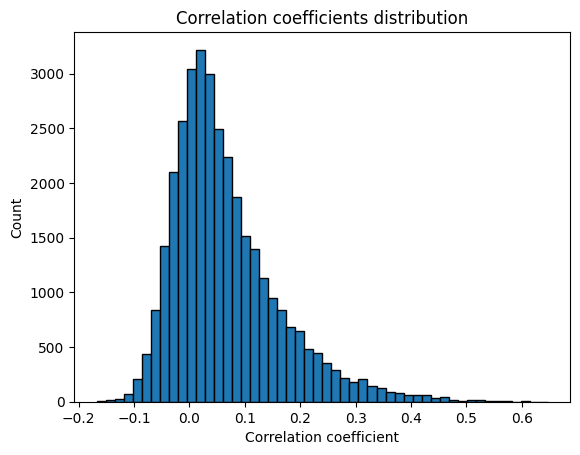

In [133]:
import matplotlib.pyplot as plt

#Extract the correlation coefficients
coefficients = df['Correlation_coefficients'].apply(lambda x: list(x.values())).sum()

#Plot the distribution of correlation coefficients
plt.hist(coefficients, bins=50, edgecolor='black')
plt.xlabel('Correlation coefficient')
plt.ylabel('Count')
plt.title('Correlation coefficients distribution')
plt.show()


In [268]:
#Choose a threshold for the correlation coefficient

up_cc_threshold = 0.35
low_cc_threshold = -0.01

In [269]:
G = nx.Graph()

for node in df.index:
    G.add_node(node)

index = 0
for node in df.index:
  for connected_node, weight in df.iloc[index]['Correlation_coefficients'].items():
    if weight >= up_cc_threshold : #and weight >= low_cc_threshold
      G.add_edge(node, connected_node, weight=weight)
  index += 1

In [270]:
MST = nx.minimum_spanning_tree(G)

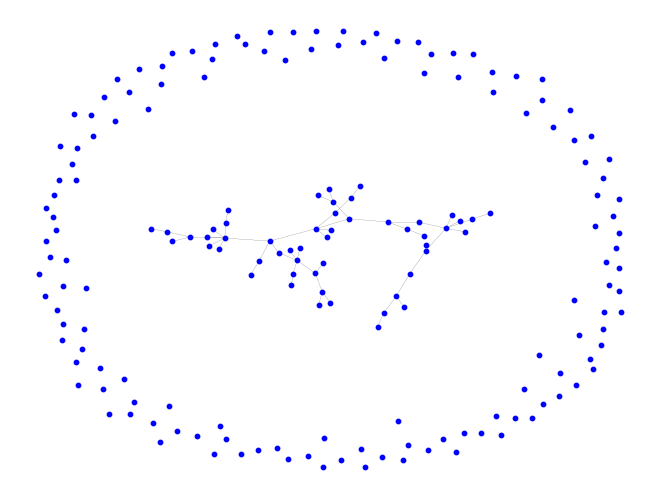

In [271]:
nx.draw(MST, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()

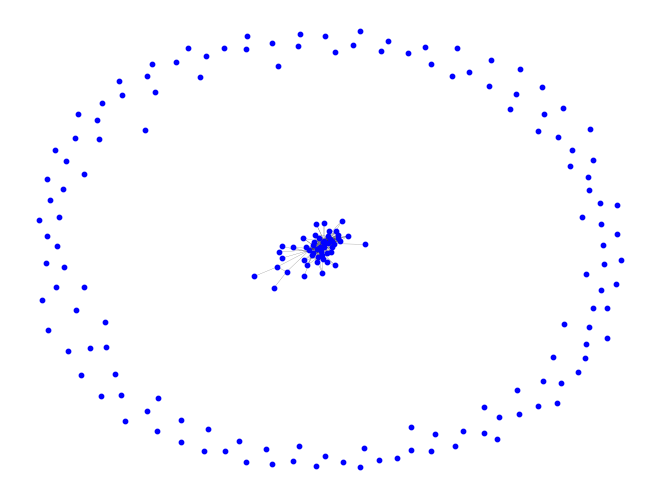

In [272]:
import matplotlib.pyplot as plt

#Network visualization
nx.draw(G, with_labels=False, node_color='blue', node_size=10, font_size=8, width=0.1)
plt.show()

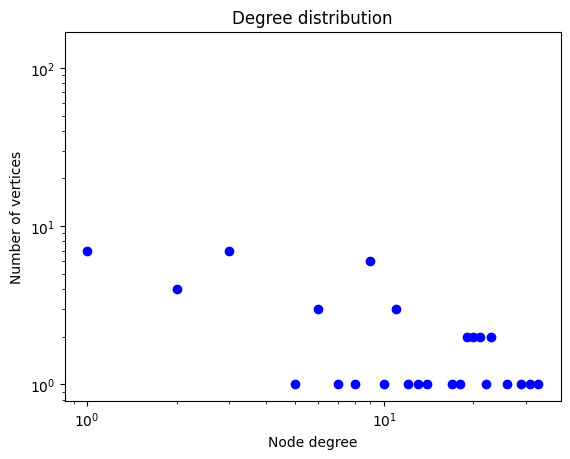

In [273]:
#Degree distribution

counts = nx.degree_histogram(G)
degrees = [i for i in range(len(counts))]

plt.scatter(degrees, counts, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Node degree')
plt.ylabel('Number of vertices')
plt.title('Degree distribution')
plt.show()


In [274]:
#The density of the graph

density = nx.density(G)
print(density)

0.016216216216216217


In [275]:
#How many nodes with degree different from zero there are

nodes_with_nozero_degree = []

for node, deg in nx.degree(G):
  if deg != 0:
    nodes_with_nozero_degree.append(node)

print(len(nodes_with_nozero_degree))

52


In [276]:
indset = nx.approximation.maximum_independent_set(G)
print(len(indset))

158


In [277]:
#CLIQUES
clique = nx.approximation.max_clique(G)
print(len(clique))

10


In [278]:
nx.approximation.average_clustering(G, trials=100000, seed=10)

0.18167

In [ ]:
# Write